https://drive.google.com/file/d/1ytqucH4x0tB7FIfRDo4C234IsLvhDqhT/view?usp=sharing  

# Предобработка

## Загрузка и описание

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('home_mortgage.csv')

In [ ]:
print(data.shape)
data.head()

(5960, 13)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


BAD: 1 = заявитель не выполнил своих обязательств по кредиту или серьезно просрочил платеж; 0 = заявитель выплатил кредит (целевая переменная)  
LOAN: сумма запроса на кредит  
MORTDUE: сумма задолженности по существующей ипотеке  
VALUE: стоимость текущей недвижимости  
REASON: DebtCon = консолидация долга; Homelmp = улучшение жилья  
JOB: Профессия  
YOJ: Лет на нынешней работе  
DEROG: Количество отказов в кредите  
DELINQ: Количество просроченных кредитных линий.  
CLAGE: Срок действия самой старой кредитной линии в месяцах.  
NINQ: количество недавних кредитных запросов.  
CLNO: количество кредитных линий  
DEBTINC: соотношение долга к доходу  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
data.duplicated().sum()

0

## Пропуски

In [ ]:
data.isnull().sum()

,0
BAD,0
LOAN,0
MORTDUE,518
VALUE,112
REASON,252
JOB,279
YOJ,515
DEROG,708
DELINQ,580
CLAGE,308


In [ ]:
numeric_columns = ['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for col in numeric_columns:
    data[col].fillna(data[col].median(), inplace=True)

categorical_columns = ['REASON', 'JOB']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-7-0ed4136ca2eb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-7-0ed4136ca2eb>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
data.shape

(5960, 13)

## Выбросы

### до

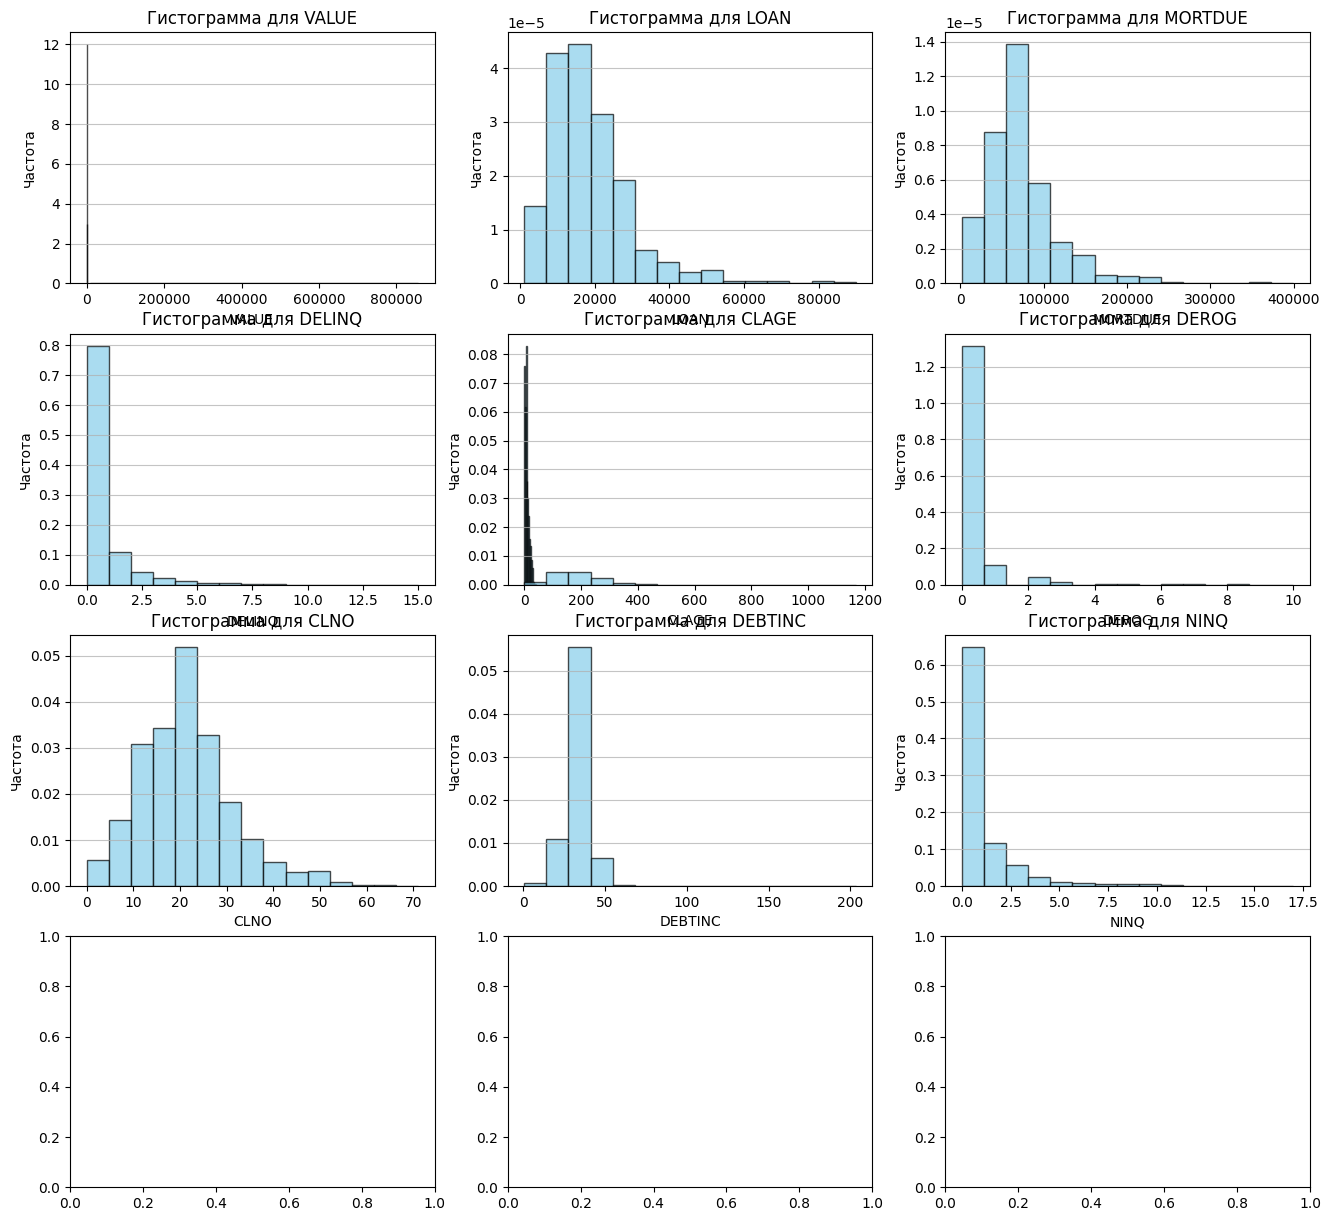

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 15))
for i, column in enumerate(numeric_columns):
    ax = axs[i // 4, i % 3]
    ax.hist(data[column], bins=15, alpha=0.7, color='skyblue', edgecolor='black', density=True)

    ax.set_title(f'Гистограмма для {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')
    ax.grid(axis='y', alpha=0.75)
plt.show()

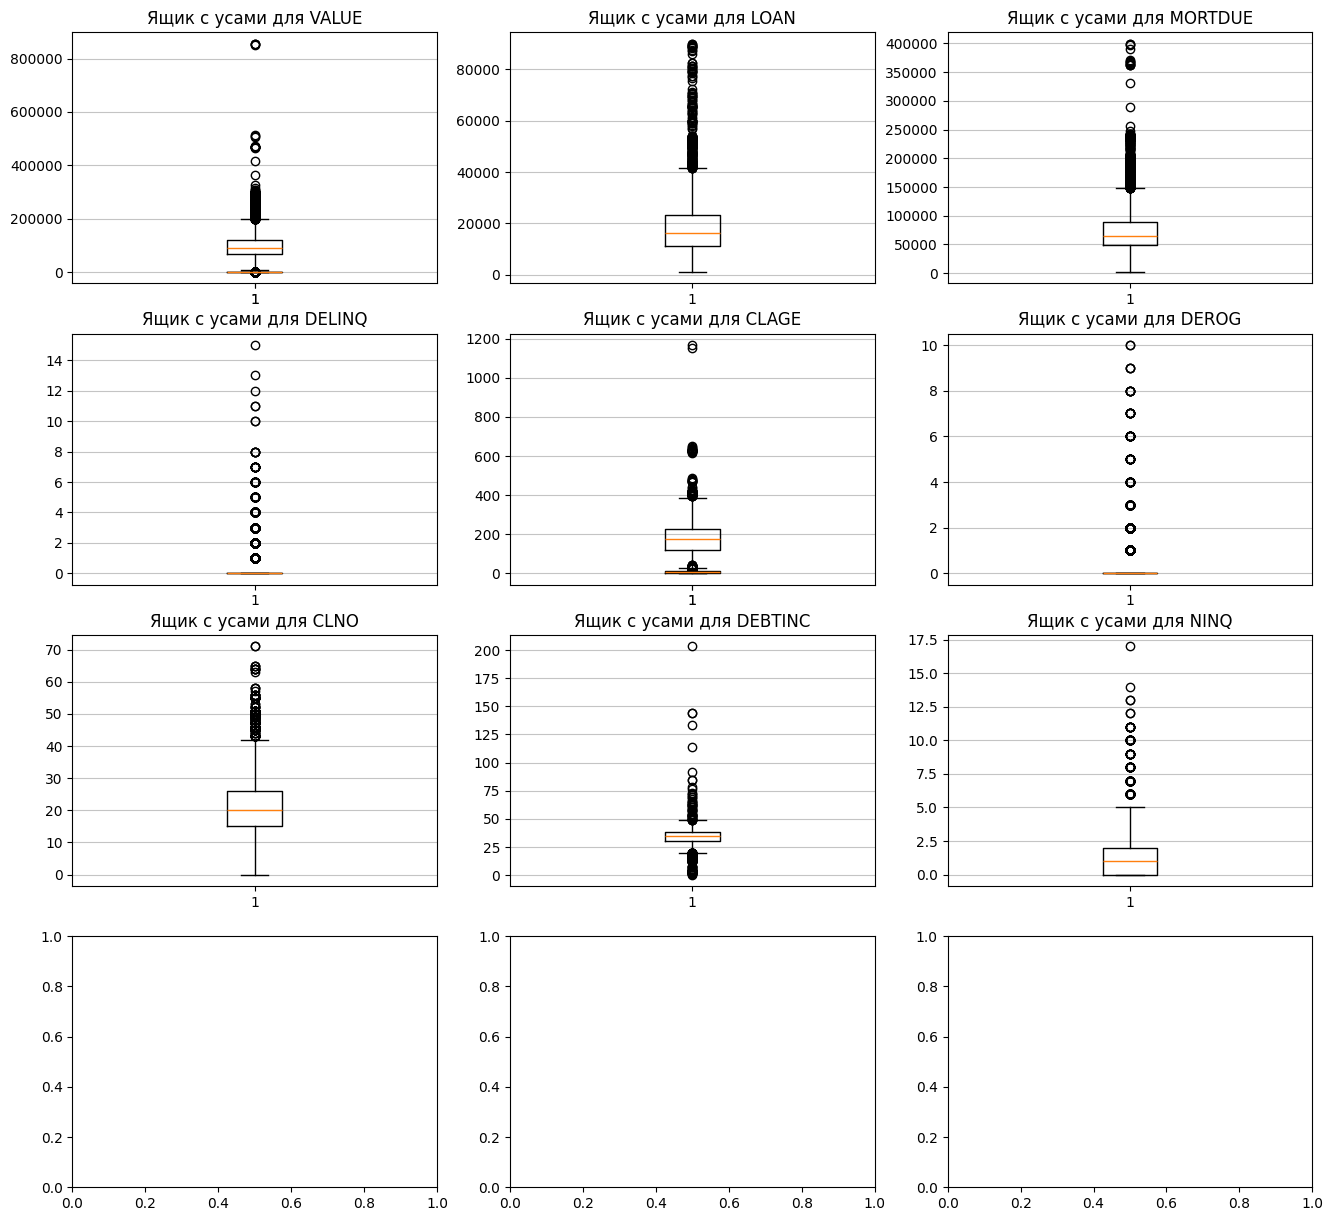

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 15))
for i, column in enumerate(numeric_columns):
    ax = axs[i // 4, i % 3]
    ax.boxplot(data[column])
    ax.set_title(f'Ящик с усами для {column}')
    ax.grid(axis='y', alpha=0.75)
plt.show()

### обработка

In [ ]:
data.shape

(5960, 13)

In [ ]:
from scipy.stats import zscore

cl_columns = ["VALUE", "LOAN", "MORTDUE", "CLAGE", "DEBTINC"]

z_scores = data[cl_columns].apply(zscore)

threshold = 5
data = data[(z_scores.abs() < threshold).all(axis=1)]



# cl_columns = ["VALUE", "LOAN", "MORTDUE", "CLAGE", "DEBTINC"]

# for column in cl_columns:
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     IQR = Q3 - Q1
#     multiplier = 3
#     lower = Q1 - multiplier * IQR
#     upper = Q3 + multiplier * IQR

#     print(f'{column}: {data[(data[column] < lower) | (data[column] > upper)]}')

#     # del
#     data = data[(data[column] >= lower) & (data[column] <= upper)]

In [ ]:
data.shape

(5880, 13)

### после

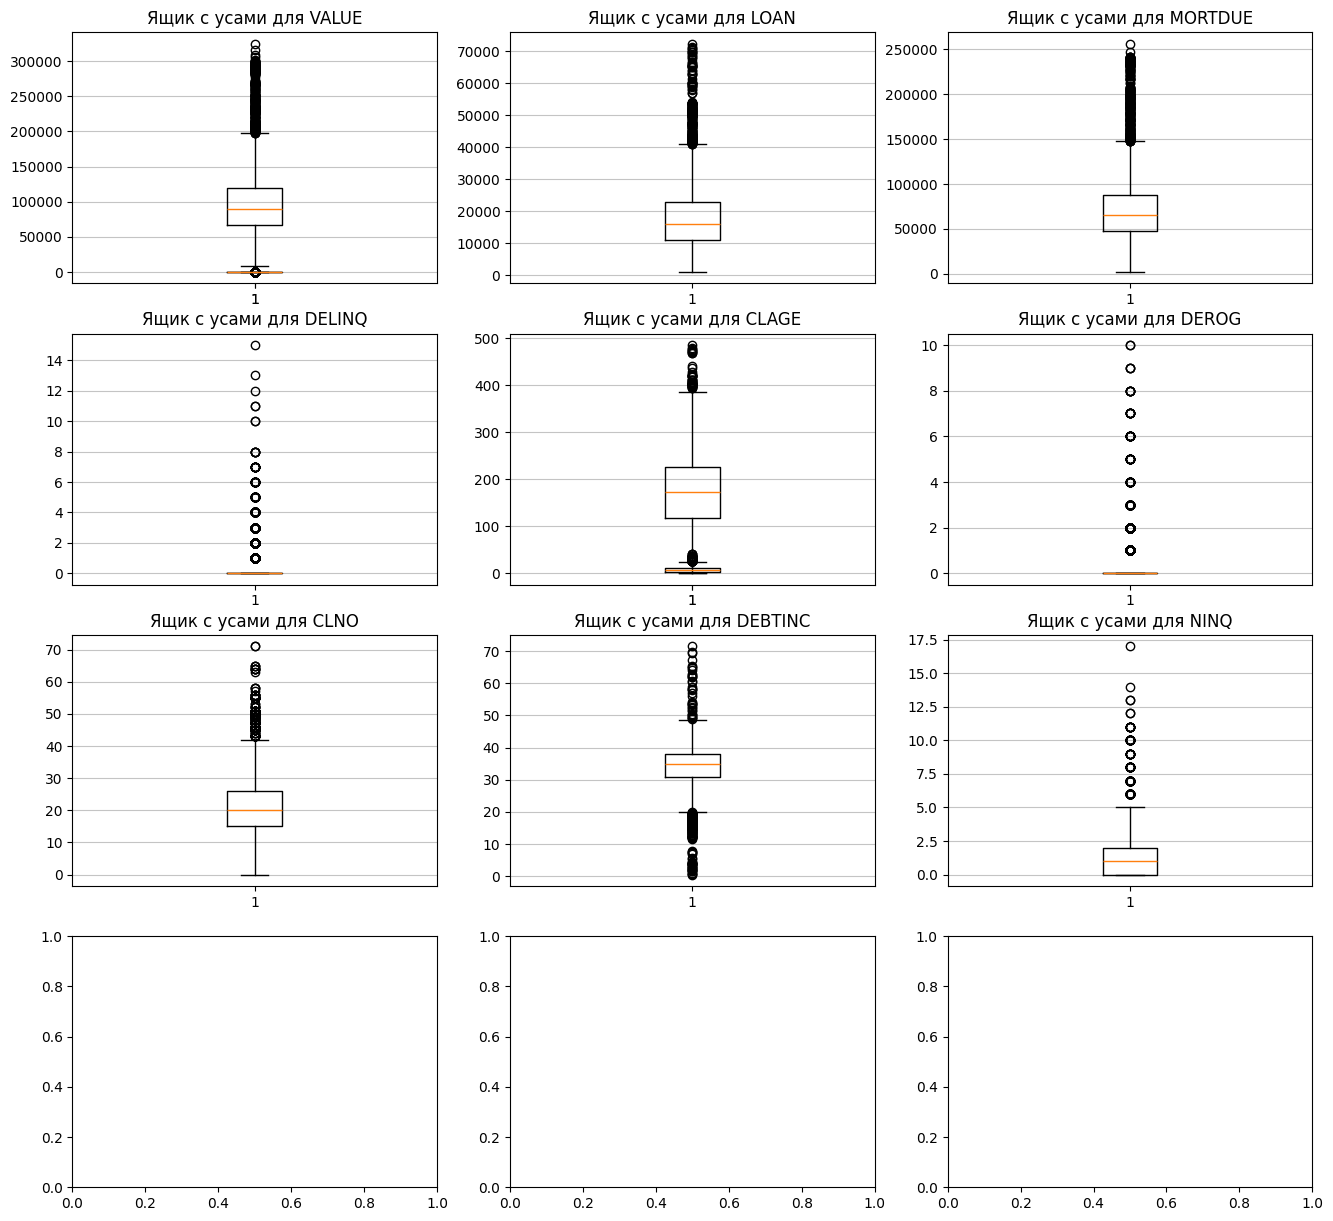

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 15))
for i, column in enumerate(numeric_columns):
    ax = axs[i // 4, i % 3]
    ax.boxplot(data[column])
    ax.set_title(f'Ящик с усами для {column}')
    ax.grid(axis='y', alpha=0.75)
plt.show()

## Кодирование категориальных

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,True,False,True,False,False,False
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,True,False,True,False,False,False
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,True,False,True,False,False,False
3,1,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,False,False,True,False,False,False
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,True,True,False,False,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5880 entries, 0 to 5930
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5880 non-null   int64  
 1   LOAN            5880 non-null   int64  
 2   MORTDUE         5880 non-null   float64
 3   VALUE           5880 non-null   float64
 4   YOJ             5880 non-null   float64
 5   DEROG           5880 non-null   float64
 6   DELINQ          5880 non-null   float64
 7   CLAGE           5880 non-null   float64
 8   NINQ            5880 non-null   float64
 9   CLNO            5880 non-null   float64
 10  DEBTINC         5880 non-null   float64
 11  REASON_HomeImp  5880 non-null   bool   
 12  JOB_Office      5880 non-null   bool   
 13  JOB_Other       5880 non-null   bool   
 14  JOB_ProfExe     5880 non-null   bool   
 15  JOB_Sales       5880 non-null   bool   
 16  JOB_Self        5880 non-null   bool   
dtypes: bool(6), float64(9), int64(2)
memor

## Прочее

In [ ]:
data["BAD"].unique()

array([1, 0])

# Обучение Sklearn

## Подготовка

### Split

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('BAD', axis=1)
y = data['BAD']
x_learn, x_test, y_learn, y_test = train_test_split(X, y, test_size=0.2)

print(f'learn: {x_learn.shape} - {y_learn.shape}; test: {x_test.shape} - {y_test.shape}')

learn: (4704, 16) - (4704,); test: (1176, 16) - (1176,)


### Balance

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print("До балансировки learn:", Counter(y_learn))
smote = SMOTE(random_state=42)
x_learn, y_learn = smote.fit_resample(x_learn, y_learn)
print("После балансировки learn:", Counter(y_learn))

print(f'learn: {x_learn.shape} - {y_learn.shape}; test: {x_test.shape} - {y_test.shape}')

До балансировки learn: Counter({0: 3777, 1: 927})
После балансировки learn: Counter({1: 3777, 0: 3777})
learn: (7554, 16) - (7554,); test: (1176, 16) - (1176,)


### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
x_learn_scaled = scaler.fit_transform(x_learn)
x_test_scaled = scaler.transform(x_test)

## Функции

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import cohen_kappa_score, accuracy_score, precision_recall_fscore_support, confusion_matrix


def metrics_graph(yl, yt, ypl, ypt, prnt = True, graph = True):
  accuracy_learn = accuracy_score(yl, ypl)
  pre_rec_f_learn = precision_recall_fscore_support(yl, ypl, average='weighted')
  precision_learn, recall_learn, f1_learn, support_learn = pre_rec_f_learn
  cohen_kappa_learn = cohen_kappa_score(yl, ypl)

  accuracy_test = accuracy_score(yt, ypt)
  pre_rec_f_test = precision_recall_fscore_support(yt, ypt, average='weighted')
  precision_test, recall_test, f1_test, support_test = pre_rec_f_test
  cohen_kappa_test = cohen_kappa_score(yt, ypt)

  if prnt:
    print(f'Learn: kappa={cohen_kappa_learn:.4f}, acc={accuracy_learn:.4f}, pre={precision_learn:.4f}, rec={recall_learn:.4f}, f1={f1_learn:.4f}, support={support_learn}')
    print(f'Test:  kappa={cohen_kappa_test:.4f}, acc={accuracy_test:.4f}, pre={precision_test:.4f}, rec={recall_test:.4f}, f1={f1_test:.4f}, support={support_test}')


  if graph:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    cm_learn = confusion_matrix(yl, y_pred_learn)
    sns.heatmap(cm_learn, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], ax = axes[0])
    axes[0].set_xlabel('Прогноз')
    axes[0].set_ylabel('Реальные значения')
    axes[0].set_title('Матрица ошибок LEARN')

    cm_test = confusion_matrix(yt, ypt)
    sns.heatmap(cm_test, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], ax = axes[1])
    axes[1].set_xlabel('Прогноз')
    axes[1].set_ylabel('Реальные значения')
    axes[1].set_title('Матрица ошибок TEST')

    plt.show()

## Модели

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier

### LogisticRegression

Learn: kappa=0.5943, acc=0.7971, pre=0.7986, rec=0.7971, f1=0.7969, support=None
Test:  kappa=0.3693, acc=0.7772, pre=0.7989, rec=0.7772, f1=0.7860, support=None


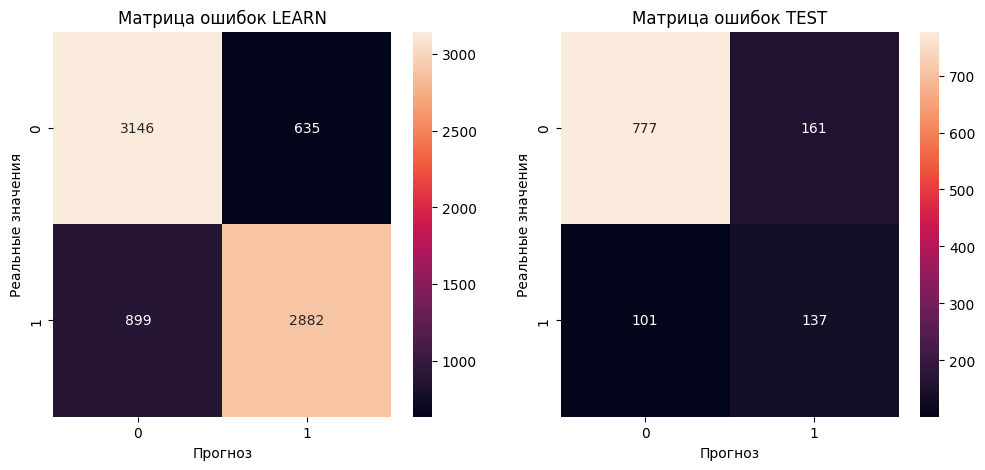

In [ ]:
model = LogisticRegression()

model.fit(x_learn_scaled, y_learn)

y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)

metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

### DecisionTreeClassifier

Learn: kappa=1.0000, acc=1.0000, pre=1.0000, rec=1.0000, f1=1.0000, support=None
Test:  kappa=0.5944, acc=0.8690, pre=0.8690, rec=0.8690, f1=0.8690, support=None


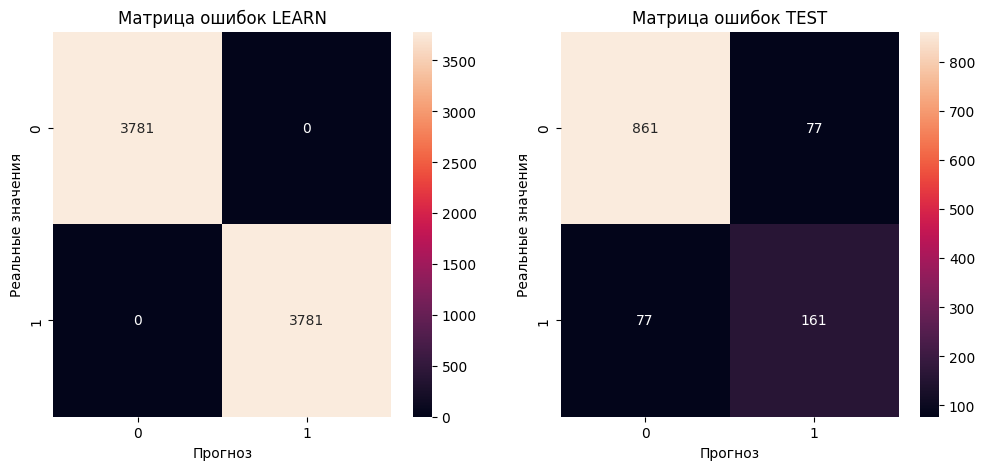

In [ ]:
model = DecisionTreeClassifier()

model.fit(x_learn_scaled, y_learn)

y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)

metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

### MLPClassifier

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learn: kappa=0.9244, acc=0.9622, pre=0.9624, rec=0.9622, f1=0.9622, support=None
Test:  kappa=0.7082, acc=0.9082, pre=0.9062, rec=0.9082, f1=0.9070, support=None


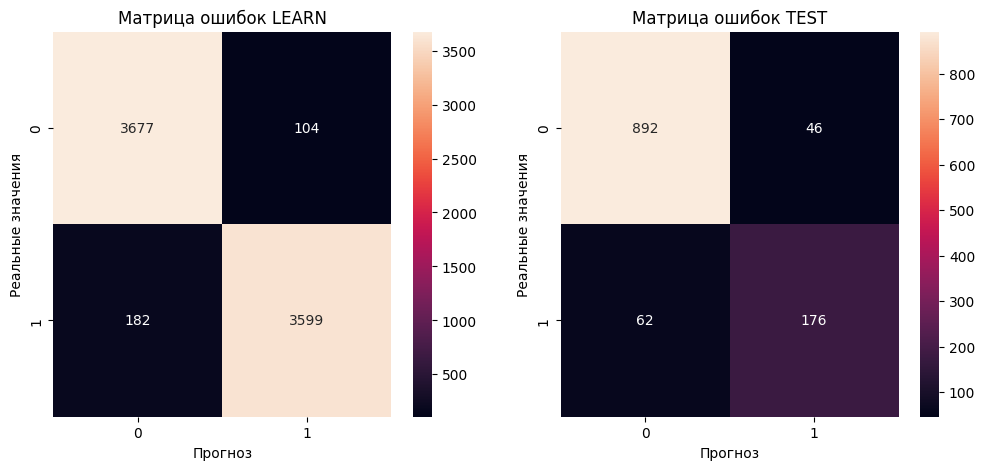

In [ ]:
model = MLPClassifier()

model.fit(x_learn_scaled, y_learn)

y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)

metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

### BaggingClassifier

Learn: kappa=0.9942, acc=0.9971, pre=0.9971, rec=0.9971, f1=0.9971, support=None
Test:  kappa=0.6920, acc=0.9031, pre=0.9010, rec=0.9031, f1=0.9018, support=None


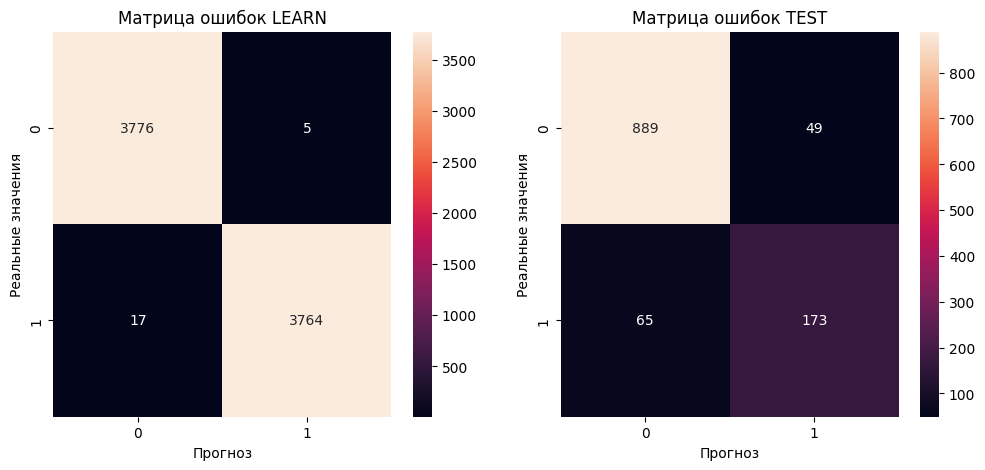

In [ ]:
model = BaggingClassifier()

model.fit(x_learn_scaled, y_learn)

y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)

metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

### RandomForestClassifier

Learn: kappa=1.0000, acc=1.0000, pre=1.0000, rec=1.0000, f1=1.0000, support=None
Test:  kappa=0.7720, acc=0.9311, pre=0.9296, rec=0.9311, f1=0.9287, support=None


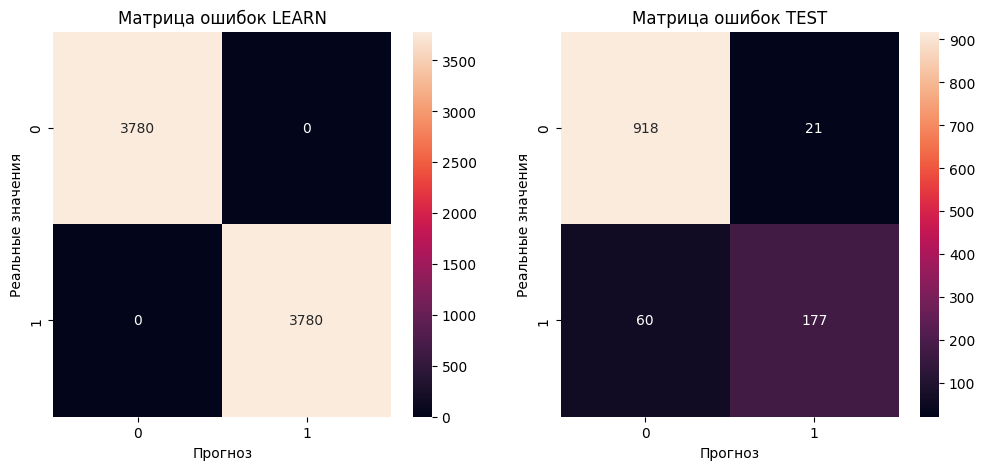

In [ ]:
model = RandomForestClassifier()

model.fit(x_learn_scaled, y_learn)

y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)

metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

### LGBMClassifier + оптимизация параметров

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Learn: kappa=1.0000, acc=1.0000, pre=1.0000, rec=1.0000, f1=1.0000, support=None
Test:  kappa=0.7968, acc=0.9388, pre=0.9376, rec=0.9388, f1=0.9369, support=None


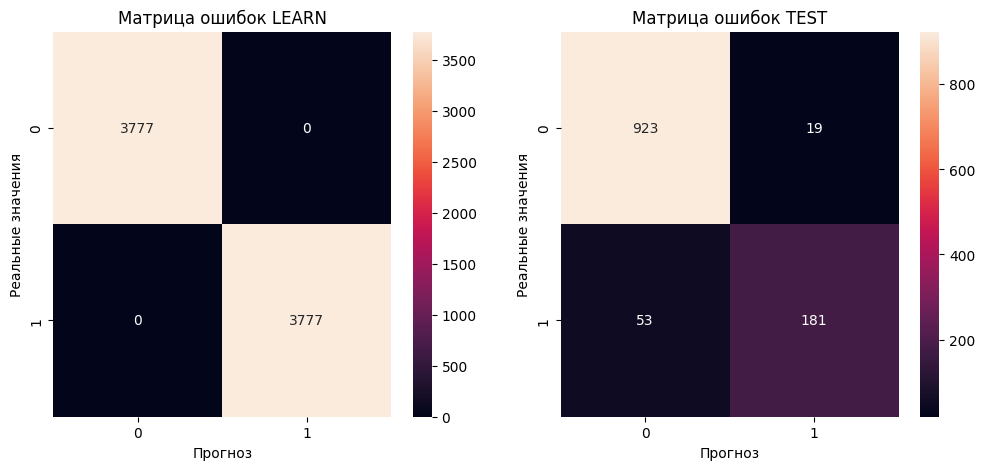

In [ ]:
model = LGBMClassifier(
    colsample_bytree=0.9767,
    learning_rate=0.2358,
    max_depth=8,
    min_child_samples=81,
    n_estimators=422,
    num_leaves=52,
    reg_alpha=0.0757,
    reg_lambda=0.5046,
    subsample=0.7811,
    objective='binary',
    random_state=42,
    verbose=-1
)

model.fit(x_learn_scaled, y_learn)

y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)

metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'num_leaves': randint(20, 100),
    'min_child_samples': randint(10, 100),
    'subsample': uniform(0.5, 0.5),  # От 0.5 до 1.0
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}


model = LGBMClassifier(random_state=42, verbose=-1)

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, scoring='f1', cv=3, n_jobs=-1, verbose=1)
random_search.fit(x_learn_scaled, y_learn)

print("Лучшие параметры:", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Лучшие параметры: {'colsample_bytree': 0.9767432519060104, 'learning_rate': 0.23576618383835965, 'max_depth': 8, 'min_child_samples': 81, 'n_estimators': 422, 'num_leaves': 52, 'reg_alpha': 0.07572391408416035, 'reg_lambda': 0.5045820002609777, 'subsample': 0.7810727279137819}


### Итоги

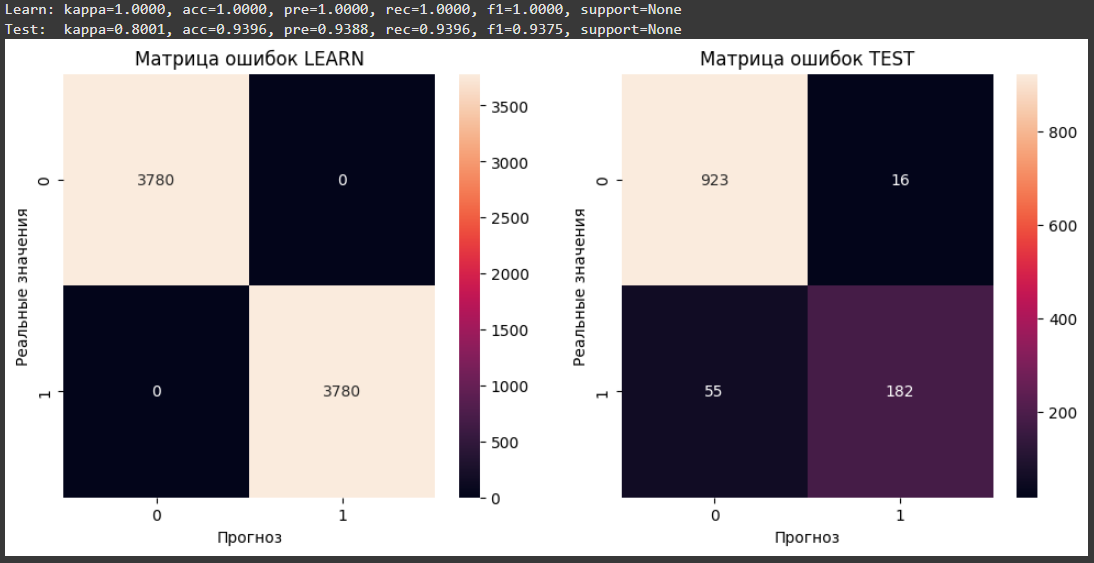

## Ансамбли

In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier, RandomForestClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
model1 = LGBMClassifier(random_state=42,)
model2 = XGBClassifier(random_state=42)
model3 = SVC(probability=True, random_state=42)

meta_model = LGBMClassifier(
    colsample_bytree=0.9767,
    learning_rate=0.2358,
    max_depth=8,
    min_child_samples=81,
    n_estimators=422,
    num_leaves=52,
    reg_alpha=0.0757,
    reg_lambda=0.5046,
    subsample=0.7811,
    objective='binary',
    random_state=42,
    verbose=-1
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Learn: kappa=0.9788, acc=0.9894, pre=0.9895, rec=0.9894, f1=0.9894, support=None
Test:  kappa=0.7695, acc=0.9311, pre=0.9296, rec=0.9311, f1=0.9287, support=None


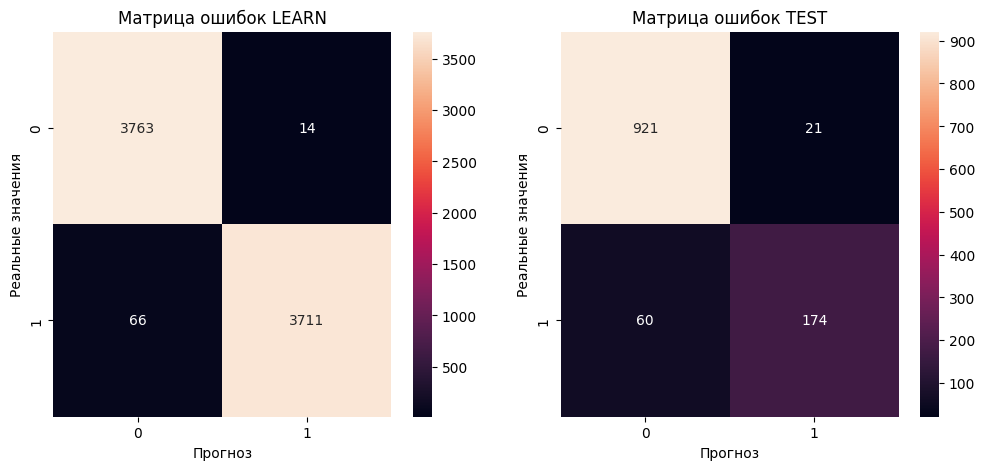

In [ ]:
model = VotingClassifier(estimators=[
    ('lgbm', model1),
    ('xgb', model2),
    ('svc', model3),
], voting='soft')


model.fit(x_learn_scaled, y_learn)

y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)

metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Learn: kappa=0.9611, acc=0.9805, pre=0.9806, rec=0.9805, f1=0.9805, support=None
Test:  kappa=0.7177, acc=0.9090, pre=0.9101, rec=0.9090, f1=0.9095, support=None


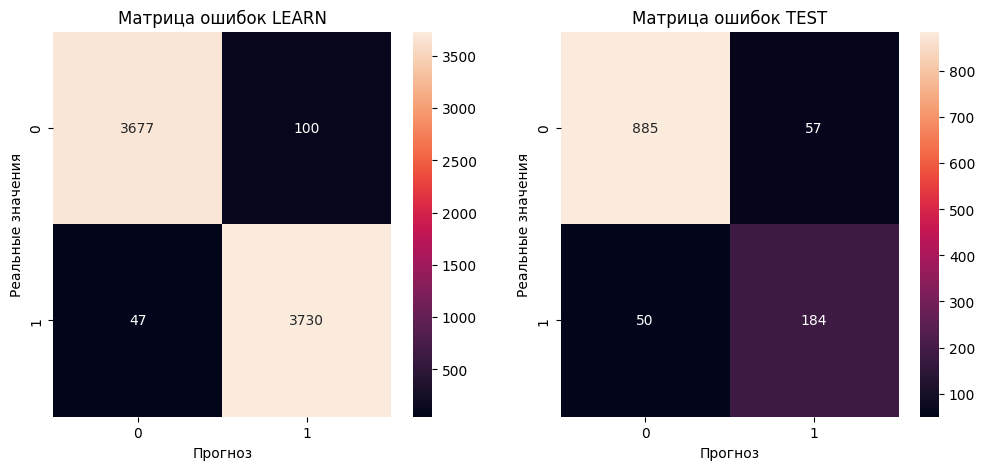

In [ ]:
model = StackingClassifier(estimators=[
    ('lgbm', model1),
    ('xgb', model2),
    ('svc', model3),
], final_estimator=meta_model)

model.fit(x_learn_scaled, y_learn)

y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)

metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

# Обучение Keras

## Подготовка

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = data.drop('BAD', axis=1)
y = data['BAD']
x_learn, x_test, y_learn, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
x_learn_norm = scaler.fit_transform(x_learn)
x_test_norm = scaler.fit_transform(x_test)

print(f'learn: {x_learn.shape} - {y_learn.shape}; test: {x_test.shape} - {y_test.shape}')

learn: (4704, 16) - (4704,); test: (1176, 16) - (1176,)


## Функции

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import cohen_kappa_score, accuracy_score, precision_recall_fscore_support, confusion_matrix, auc


def metrics_graph(yl, yt, ypl, ypt, prnt = True, graph = True):
  ypl_b = (ypl > 0.5).astype(int)
  ypt_b = (ypt > 0.5).astype(int)



  accuracy_learn = accuracy_score(yl, ypl_b)
  pre_rec_f_learn = precision_recall_fscore_support(yl, ypl_b, average='weighted')
  precision_learn, recall_learn, f1_learn, support_learn = pre_rec_f_learn
  cohen_kappa_learn = cohen_kappa_score(yl, ypl_b)
  fpr, tpr, thresholds = roc_curve(yl, ypl, pos_label=1)
  auc_learn=auc(fpr, tpr)

  accuracy_test = accuracy_score(yt, ypt_b)
  pre_rec_f_test = precision_recall_fscore_support(yt, ypt_b, average='weighted')
  precision_test, recall_test, f1_test, support_test = pre_rec_f_test
  cohen_kappa_test = cohen_kappa_score(yt, ypt_b)
  fpr, tpr, thresholds = roc_curve(yt, ypt, pos_label=1)
  auc_test=auc(fpr, tpr)

  if prnt:
    print(f'Learn: kappa={cohen_kappa_learn:.4f}, auc={auc_learn:.4f}, acc={accuracy_learn:.4f}, pre={precision_learn:.4f}, rec={recall_learn:.4f}, f1={f1_learn:.4f}')
    print(f'Test:  kappa={cohen_kappa_test:.4f}, auc={auc_test:.4f}, acc={accuracy_test:.4f}, pre={precision_test:.4f}, rec={recall_test:.4f}, f1={f1_test:.4f}')


  if graph:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    cm_learn = confusion_matrix(yl, ypl_b)
    sns.heatmap(cm_learn, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], ax = axes[0])
    axes[0].set_xlabel('Прогноз')
    axes[0].set_ylabel('Реальные значения')
    axes[0].set_title('Матрица ошибок LEARN')

    cm_test = confusion_matrix(yt, ypt_b)
    sns.heatmap(cm_test, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], ax = axes[1])
    axes[1].set_xlabel('Прогноз')
    axes[1].set_ylabel('Реальные значения')
    axes[1].set_title('Матрица ошибок TEST')

    plt.show()

## Обучение

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

model = Sequential([
  Input(shape=[x_learn_norm.shape[1]]),
  Dense(256, activation='selu'),
  Dropout(0.08),
  Dense(128, activation='relu'),
  Dropout(0.05),
  Dense(1, activation='sigmoid')
])

callback = EarlyStopping(monitor='val_AUC', patience=10, min_delta=0.001, restore_best_weights=True)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy', 'AUC']
)

In [ ]:
model.fit(x_learn_norm, y_learn, epochs=10, validation_split=0.2, callbacks=[callback])

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.9517 - accuracy: 0.9258 - loss: 0.1970 - val_AUC: 0.9068 - val_accuracy: 0.8959 - val_loss: 0.2840
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.9493 - accuracy: 0.9245 - loss: 0.1959 - val_AUC: 0.9079 - val_accuracy: 0.8959 - val_loss: 0.2821
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9560 - accuracy: 0.9296 - loss: 0.1957 - val_AUC: 0.9144 - val_accuracy: 0.8927 - val_loss: 0.2732
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9590 - accuracy: 0.9290 - loss: 0.1789 - val_AUC: 0.8962 - val_accuracy: 0.8937 - val_loss: 0.2990
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9548 - accuracy: 0.9247 - loss: 0.1981 - val_AUC: 0.9114 - val_accuracy: 0.8959 - val_loss: 0.2799
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9560 - accuracy: 0.9267 - loss: 0.1965 - val_AUC: 0.9060 - val_accuracy: 0.8969 - val_loss: 0.2889
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


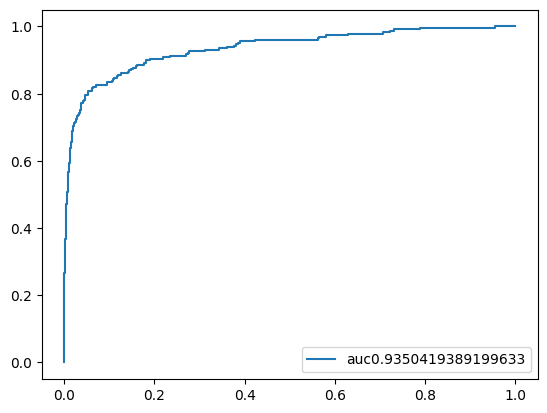

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_learn = model.predict(x_learn_norm)
y_pred_test = model.predict(x_test_norm)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test, pos_label=1)
auc=auc(fpr, tpr)
plt.plot(fpr, tpr, label='auc'+str(auc))
plt.legend()
plt.show()

Learn: kappa=0.7671, auc=0.9661, acc=0.9324, pre=0.9321, rec=0.9324, f1=0.9289
Test:  kappa=0.7124, auc=0.9350, acc=0.9192, pre=0.9182, rec=0.9192, f1=0.9141


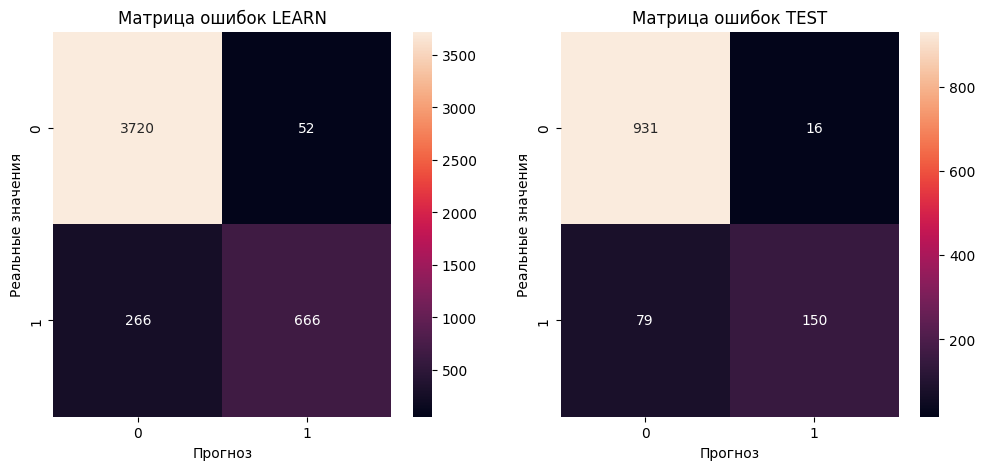

In [ ]:
metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

# Сверточные сети, MNIST

## Импорт и подготовка данных

In [ ]:
import keras
from keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print(f"Обучающая выборка: {x_train.shape}")
print(f"Метки обучающей выборки: {y_train.shape}")
print(f"Тестовая выборка: {x_test.shape}")
print(f"Метки тестовой выборки: {y_test.shape}")

Обучающая выборка: (60000, 28, 28)
Метки обучающей выборки: (60000,)
Тестовая выборка: (10000, 28, 28)
Метки тестовой выборки: (10000,)


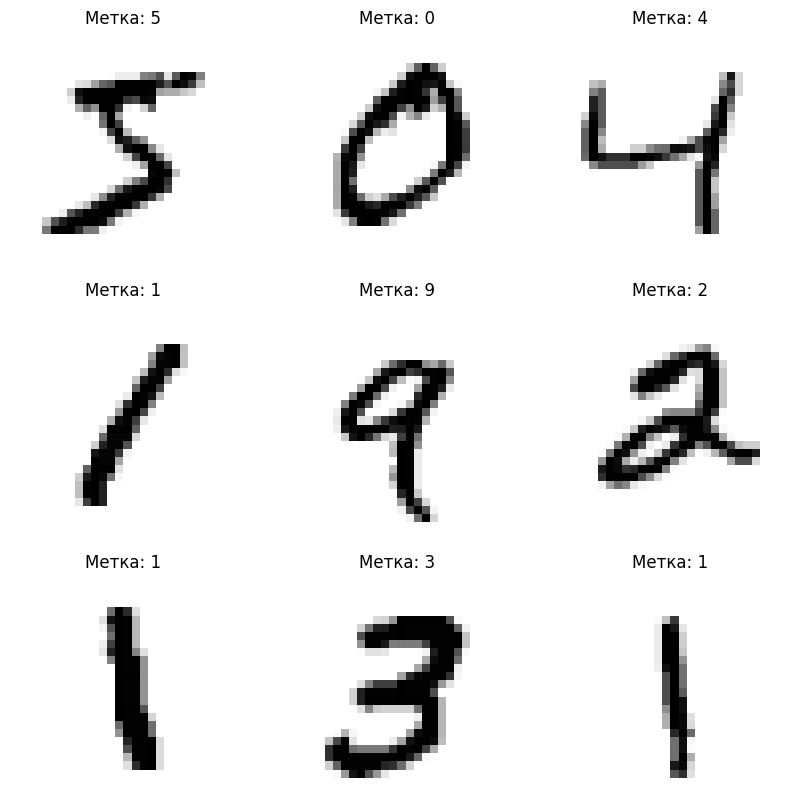

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray_r')
    plt.title(f"Метка: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Модель и обучение

In [ ]:
from keras import layers, models
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(192, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

learning_rate = 0.001
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 256)         │          73,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 192)                 │       1,228,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,305,226 (4.98 MB)

 Trainable params: 1,305,226 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# обучаю по 1 эпохе чтобы не ждать долго, при желании дообучить
epochs = 1
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=epochs,
    validation_split=0.1,
    verbose=1
)

422/422 ━━━━━━━━━━━━━━━━━━━━ 112s 266ms/step - accuracy: 0.9564 - loss: 0.1430 - val_accuracy: 0.9853 - val_loss: 0.0512


## Оценка

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"test loss: {test_loss:.4f}")
print(f"test accuracy: {test_accuracy:.4f}")

test loss: 0.0543
test accuracy: 0.9825


In [ ]:
print(f"classification report:\n"+classification_report(y_true_classes, y_pred_classes))

classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



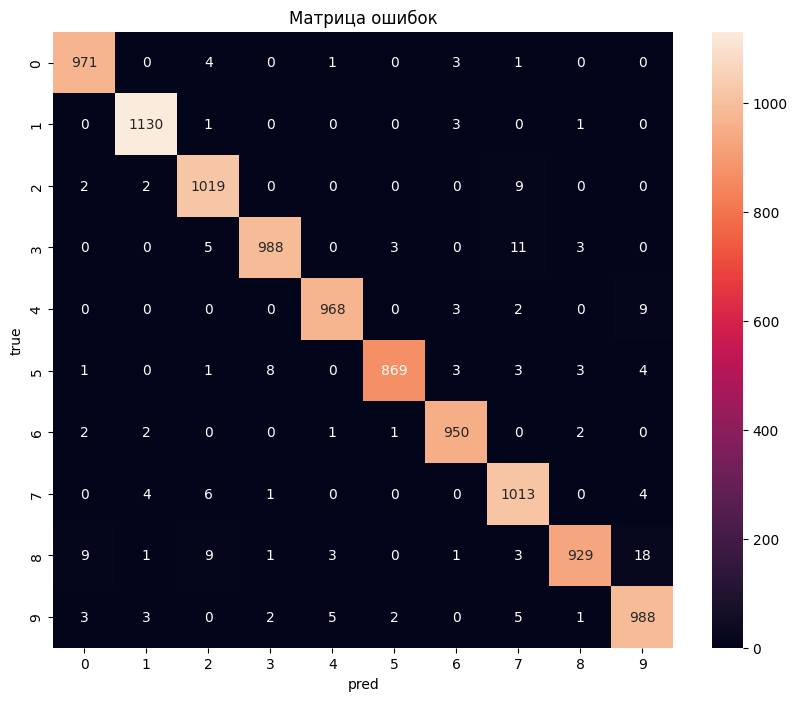

In [ ]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('pred')
plt.ylabel('true')
plt.title('Матрица ошибок')
plt.show()

## Подбор гиперпараметров

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import keras
from keras import layers, models
import keras_tuner as kt

def build_model(hp):
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(
            filters=hp.Int('conv1_filters', 32, 128, step=32),
            kernel_size=(3, 3),
            activation='relu'
        ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(
            filters=hp.Int('conv2_filters', 64, 256, step=64),
            kernel_size=(3, 3),
            activation='relu'
        ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(
            units=hp.Int('dense_units', 64, 256, step=64),
            activation='relu'
        ),
        layers.Dense(10, activation='softmax')
    ])

    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_tuning_dir',
    project_name='mnist_cnn'
)

In [ ]:
tuner.search(
    x_train, y_train,
    epochs=1,
    validation_split=0.1,
    verbose=1
)

Trial 5 Complete [00h 03m 03s]
val_accuracy: 0.9773333072662354

Best val_accuracy So Far: 0.9794999957084656
Total elapsed time: 00h 17m 07s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print("Best Hyperparameters:", best_hyperparameters.values)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Test Loss: 0.08229540288448334
Test Accuracy: 0.9779999852180481
Best Hyperparameters: {'conv1_filters': 32, 'conv2_filters': 256, 'dense_units': 192, 'learning_rate': 0.001}


## Проверка на собственных данных

In [ ]:
from PIL import Image, ImageFilter

def imageprepare(argv):
    """
    This function returns the pixel values as (1, 28, 28) np.array.
    The input is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.LANCZOS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.LANCZOS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    tv = list(newImage.getdata())  # get pixel values
    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 for x in tv]
    tva = np.reshape(tva, (1, -1, 28))
    return tva

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


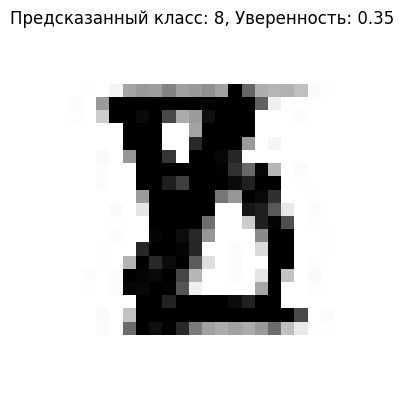

In [ ]:
image_path = "test0.png"
image = imageprepare(image_path)
prediction = model.predict(image)

predicted_class = np.argmax(prediction, axis=1)[0]
confidence = np.max(prediction)

plt.imshow(image.squeeze(), cmap='gray_r')
plt.title(f"Предсказанный класс: {predicted_class}, Уверенность: {confidence:.2f}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


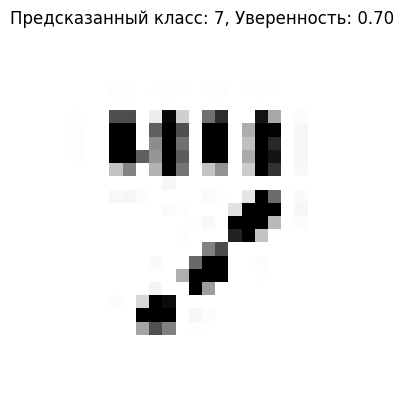

In [ ]:
image_path = "test1.png"
image = imageprepare(image_path)
prediction = model.predict(image)

predicted_class = np.argmax(prediction, axis=1)[0]
confidence = np.max(prediction)

plt.imshow(image.squeeze(), cmap='gray_r')
plt.title(f"Предсказанный класс: {predicted_class}, Уверенность: {confidence:.2f}")
plt.axis('off')
plt.show()